# 1. Import Dependencies and Data Pre-processing

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

In [2]:
df = pd.read_csv("./dhaka_2020-2022.csv")
df.head()

,time,temperature_2m_mean
0,2020-01-01,19.6
1,2020-01-02,20.5
2,2020-01-03,17.3
3,2020-01-04,17.2
4,2020-01-05,16.5


In [3]:
df.columns

Index(['time', 'temperature_2m_mean'], dtype='object')

In [4]:
df.shape

(1096, 2)

In [5]:
df.dtypes

time                    object
temperature_2m_mean    float64
dtype: object

In [6]:
df["time"] = pd.to_datetime(df["time"])

In [7]:
df.dtypes

time                   datetime64[ns]
temperature_2m_mean           float64
dtype: object

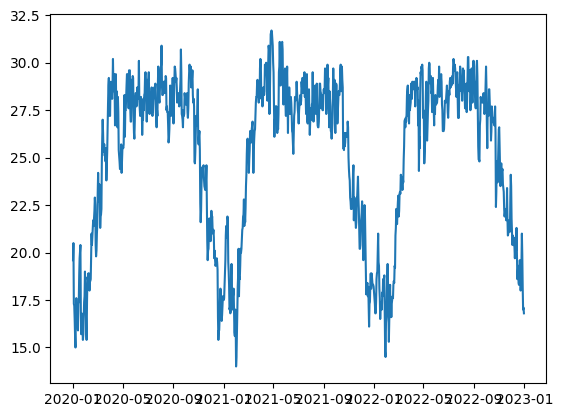

In [8]:
plt.plot(df["time"], df["temperature_2m_mean"])
plt.show()

In [9]:
df.columns = ["ds", "y"]
df.head()

,ds,y
0,2020-01-01,19.6
1,2020-01-02,20.5
2,2020-01-03,17.3
3,2020-01-04,17.2
4,2020-01-05,16.5


# 2. Train Model

In [10]:
m = NeuralProphet()

In [11]:
model = m.fit(df, freq="D", epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (35) is too small than the required number for the learning rate finder (226). The results might not be optimal.


Finding best initial lr:   0%|          | 0/226 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

# 3. Forecast and Save Model

In [12]:
future = m.make_future_dataframe(df, periods=10000)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.99% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.99% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 35it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2023-01-01,None,18.542177,26.254084,-7.681605,-0.030302
1,2023-01-02,None,18.450079,26.261478,-7.716438,-0.094960
2,2023-01-03,None,18.514027,26.268871,-7.749531,-0.005312
3,2023-01-04,None,18.472609,26.276264,-7.780932,-0.022724
4,2023-01-05,None,18.537296,26.283659,-7.810672,0.064310


In [13]:
forecast.shape

(10000, 6)

In [14]:
forecast.dtypes

ds               datetime64[ns]
y                        object
yhat1                   float64
trend                   float64
season_yearly           float64
season_weekly           float64
dtype: object

In [15]:
forecast.to_csv("./forcast.csv")

# The END